In [1]:
import tensorflow as tf

In [2]:
model=tf.keras.models.load_model('dnn_model')

In [3]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 15)               31        
 n)                                                              
                                                                 
 dense_7 (Dense)             (None, 64)                1024      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,280
Trainable params: 5,249
Non-trainable params: 31
_________________________________________________________________


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('CO2 Emissions_Canada.csv')

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Fuel Type', ylabel='count'>

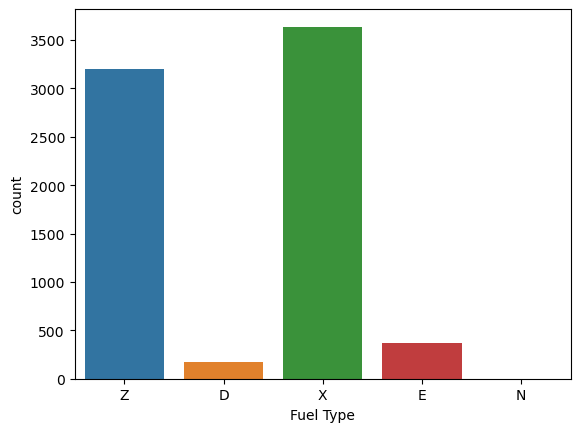

In [5]:
sns.countplot(x='Fuel Type',data=df)

In [12]:
df.drop(index=df[df['Fuel Type']=='N'].index[0],inplace=True)

In [251]:
df[df['Fuel Type']=='N'].values

array([['CHEVROLET', 'IMPALA DUAL FUEL', 'MID-SIZE', 3.6, 6, 'AS6', 'N',
        15.2, 9.5, 12.7, 22, 213]], dtype=object)

In [9]:
len(df.columns)

12

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [12]:
import sklearn

In [13]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()
le_1=LabelEncoder()
le_2=LabelEncoder()
le_3=LabelEncoder()

In [51]:
df['Make']=le.fit_transform(df['Make'])

In [52]:
df['Make']=df['Make'].apply(lambda x:x+1)

In [53]:
df['Model']=le_1.fit_transform(df['Model'])
df['Model']=df['Model'].apply(lambda x:x+1)

In [54]:
df['Vehicle Class']=le_2.fit_transform(df['Vehicle Class'])
df['Vehicle Class']=df['Vehicle Class'].apply(lambda x:x+1)

In [55]:
df['Transmission']=le_3.fit_transform(df['Transmission'])
df['Transmission']=df['Transmission'].apply(lambda x:x+1)

In [56]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,1,1058,1,2.0,4,15,Z,9.9,6.7,8.5,33,196
1,1,1058,1,2.4,4,26,Z,11.2,7.7,9.6,29,221
2,1,1059,1,1.5,4,23,Z,6.0,5.8,5.9,48,136
3,1,1234,12,3.5,6,16,Z,12.7,9.1,11.1,25,255
4,1,1500,12,3.5,6,16,Z,12.1,8.7,10.6,27,244


In [57]:
df=pd.get_dummies(df,columns=['Fuel Type'])

In [58]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,1,1058,1,2.0,4,15,9.9,6.7,8.5,33,196,0,0,0,0,1
1,1,1058,1,2.4,4,26,11.2,7.7,9.6,29,221,0,0,0,0,1
2,1,1059,1,1.5,4,23,6.0,5.8,5.9,48,136,0,0,0,0,1
3,1,1234,12,3.5,6,16,12.7,9.1,11.1,25,255,0,0,0,0,1
4,1,1500,12,3.5,6,16,12.1,8.7,10.6,27,244,0,0,0,0,1


In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['CO2 Emissions(g/km)']=sc.fit_transform(df[['CO2 Emissions(g/km)']])

In [106]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,1,1058,1,2.0,4,15,9.9,6.7,8.5,33,-0.932933,0,0,0,0,1
1,1,1058,1,2.4,4,26,11.2,7.7,9.6,29,-0.505646,0,0,0,0,1
2,1,1059,1,1.5,4,23,6.0,5.8,5.9,48,-1.958421,0,0,0,0,1
3,1,1234,12,3.5,6,16,12.7,9.1,11.1,25,0.075464,0,0,0,0,1
4,1,1500,12,3.5,6,16,12.1,8.7,10.6,27,-0.112542,0,0,0,0,1


In [67]:
import numpy as np
l=np.array(["ACURA"])
(le.transform(l)+1)[0]

1

In [254]:
fuel=["Z","D","X","E","N"]
fuel=pd.DataFrame(fuel,index=fuel,columns=['Fuel'])
fuel.head()

,Fuel
Z,Z
D,D
X,X
E,E
N,N


In [255]:
fuel=pd.get_dummies(fuel,columns=['Fuel'])

In [192]:
fuel=fuel.iloc[:,[4,0,3,1,2]]

In [256]:
fuel[fuel.index=="Z"].values.flatten()

array([0, 0, 0, 0, 1], dtype=uint8)

In [269]:
#new perdiction Z D X E N
l=list(df[df['Fuel Type']=='N'].values.flatten())
l[0]=(le.transform(np.array([l[0]]))+1)[0]
l[1]=(le_1.transform(np.array([l[1]]))+1)[0]
l[2]=(le_2.transform(np.array([l[2]]))+1)[0]
l[5]=(le_3.transform(np.array([l[5]]))+1)[0]
pred=[l[0],l[1],l[2],l[3],l[4],l[5]]
fuel_arr=list(fuel[fuel.index==l[6]].values.flatten())
for i in range(7,len(l)):
    pred.append(l[i])
pred=pred+fuel_arr

In [271]:
pred.pop(10)

213

In [272]:
pred=np.array(pred)

In [273]:
pred

array([1.000e+01, 1.061e+03, 3.000e+00, 3.600e+00, 6.000e+00, 1.600e+01,
       1.520e+01, 9.500e+00, 1.270e+01, 2.200e+01, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00])

In [101]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 15)               31        
 n)                                                              
                                                                 
 dense_7 (Dense)             (None, 64)                1024      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,280
Trainable params: 5,249
Non-trainable params: 31
_________________________________________________________________


In [274]:
val=model.predict(pred)

1/1 [==============================] - 0s 22ms/step


In [276]:
val

array([[1.7237006e+08]], dtype=float32)

## Time series

In [1]:
import rdata

In [15]:
with open("arima_model.RDA","rb") as f:
    parsed=rdata.parser.parse_data(f.read())

In [22]:
converted=rdata.conversion.convert(parsed)

C:\Users\nidhikrish\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "Arima". The underlying R object is returned instead.
  warnings.warn(


In [4]:
import pickle

In [17]:
pickle.dump(parsed,open("forecast_model_2.pickle","wb"))

In [20]:
model=pickle.load(open("forecast_model_1.pickle","rb"))

## RPY2

In [1]:
import rpy2

In [3]:
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

In [8]:
readRDS=robjects.r['readRDS']

In [32]:
model=readRDS('arima_model.rda')

In [35]:
model.names

'coef','sigma2','var.coef',...,'n.cond','nobs','model'


In [12]:
utils=importr('utils')

In [13]:
utils.install_packages('forecast',repos="https://cloud.r-project.org")

R[write to console]: Installing package into 'C:/Users/nidhikrish/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

R[write to console]: also installing the dependencies 'xts', 'TTR', 'quadprog', 'quantmod', 'fracdiff', 'lmtest', 'tseries', 'urca', 'zoo', 'RcppArmadillo'


R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.2/xts_0.12.2.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 819985 bytes (800 KB)

R[write to console]: downloaded 800 KB


R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.2/TTR_0.24.3.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 519666 bytes (507 KB)

R[write to console]: downloaded 507 KB


R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.2/quadprog_1.5-8.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 36699 bytes (35 KB)

R[write to con

package 'xts' successfully unpacked and MD5 sums checked
package 'TTR' successfully unpacked and MD5 sums checked
package 'quadprog' successfully unpacked and MD5 sums checked
package 'quantmod' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'zoo' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nidhikrish\AppData\Local\Temp\RtmpMXzbrC\downloaded_packages


<rpy2.rinterface_lib.sexp.NULLType object at 0x000002C941D4EDC0> [RTYPES.NILSXP]

In [26]:
a=24
robjects.r.assign('a',a)

24


In [30]:
year=12
end_date="01/01/" + str(1991+year)
print(end_date)

01/01/2003


In [27]:
rpy2.__version__

'3.5.6'

In [5]:
result=robjects.r('''
load<-readRDS("arima_model.rda")
pred<-predict(load,n.ahead=a)
''')

In [6]:
result[0]

15.886494,16.391791,16.068064,...,16.778678,16.323345,16.332627


In [7]:
import pandas as pd
df=pd.read_csv('CO2 dataset.csv')

In [8]:
df.dropna(inplace=True)

In [9]:
df['Year']=pd.to_datetime(df['Year'],format="%Y")

In [10]:
df.set_index(['Year'],inplace=True)

In [11]:
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [12]:
df.index.freq='YS'

<AxesSubplot:xlabel='Year'>

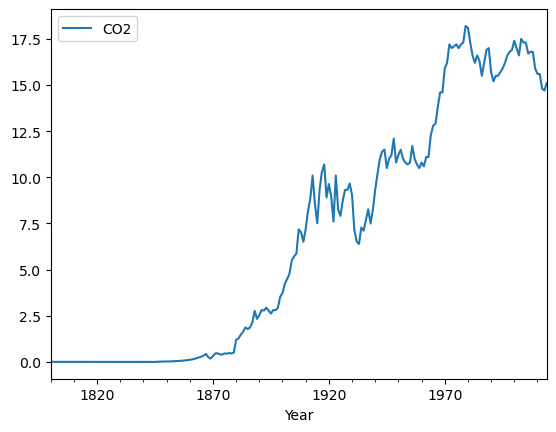

In [13]:
df.plot()

In [14]:
train_df=df.loc[:'1990-01-01']

<AxesSubplot:xlabel='Year'>

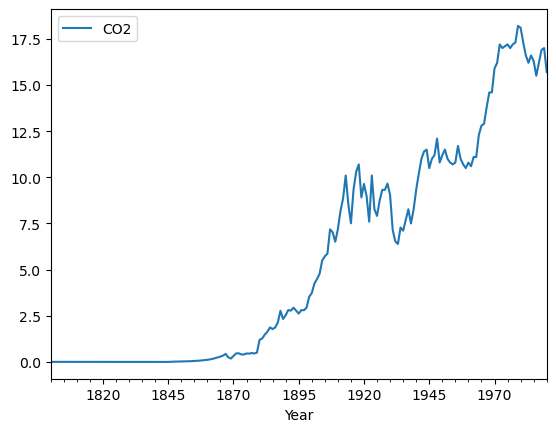

In [15]:
train_df.plot()

In [16]:
df.tail()

,CO2
Year,
2010-01-01,15.6
2011-01-01,15.6
2012-01-01,14.8
2013-01-01,14.7
2014-01-01,15.1


In [17]:
date_rng=pd.date_range(start='01/01/1991',end='01/01/2015',freq='Y')

In [18]:
date_rng

DatetimeIndex(['1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31',
               '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31',
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [19]:
new_df=pd.DataFrame(result[0],index=date_rng,columns=["CO2"])

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

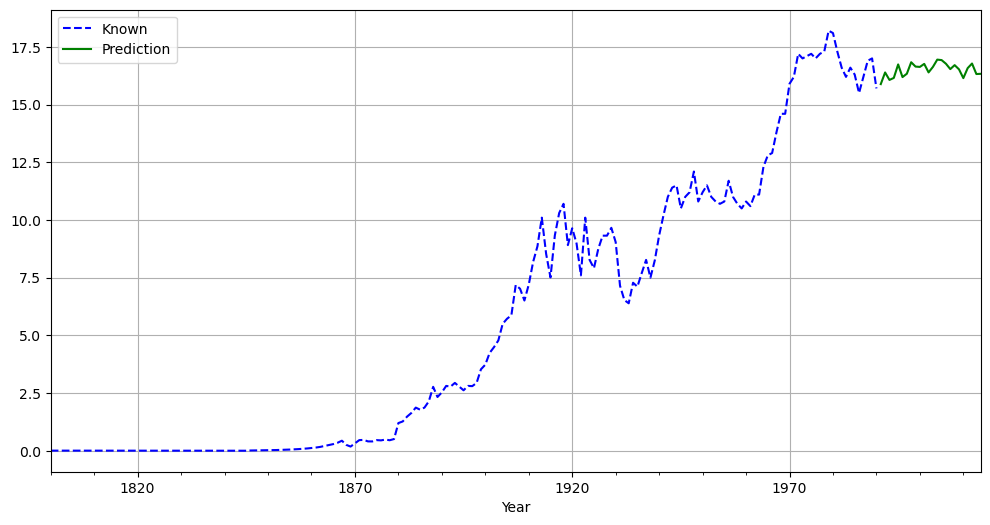

In [21]:
plt.figure(figsize=(12,6))
train_df['CO2'].plot(color='b',style='--',legend=True,label="Known",grid=True)
new_df['CO2'].plot(color='g',legend=True,label='Prediction',grid=True)
plt.show()